In [1]:
import cv2


In [4]:
# specific colors from image

# Red -> red_plane - gray
# Green -> green_plane - gray
# Blue -> blue_plane - gray
# Cyan -> gray - red_plane
# Megenta -> gray - green_plane
# Yellow -> gray - blue_plane 

# RGB Image
# R=255,G=0,B=0
# R=0,G=255,B=0
# R=255,G=255,B=0
# R=0,G=0,B=255

# Grey Image
# 0.6R+0.3G+0.1B



In [5]:
img = cv2.imread('robot2.jpg')
img.shape


(600, 600, 3)

In [6]:
img[:,:,-1].shape

(600, 600)

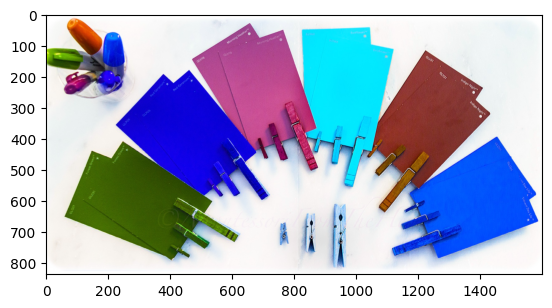

In [7]:
img = cv2.imread('rrr.jpeg')
import matplotlib.pyplot as plt
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
red_plane = img[:,:,-1].copy()
green_plane = img[:,:,-2].copy()
blue_plane = img[:,:,-3].copy()

In [9]:
red_color = cv2.subtract(red_plane, gray)
green_color = cv2.subtract(green_plane, gray)
blue_color = cv2.subtract(blue_plane, gray)
yellow_color = cv2.subtract(gray, blue_plane)
megenta_color = cv2.subtract(gray, green_plane)
cyan_color = cv2.subtract(gray, red_plane)

In [11]:
def imshow(im, title,type = '', ):
    if type:
        plt.imshow(im, cmap = type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

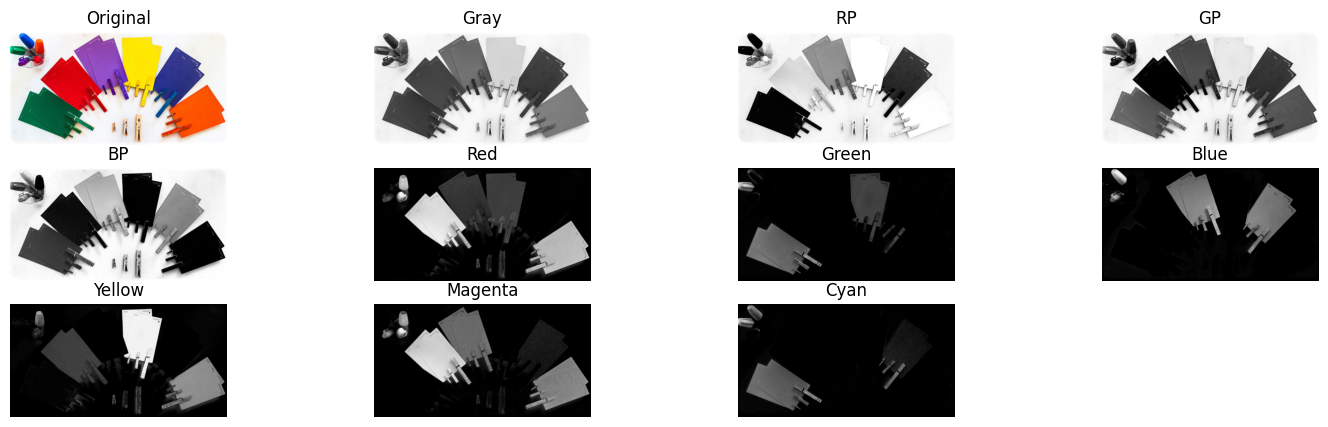

In [12]:

plt.figure(figsize=(18,5))
plt.subplot(3,4,1); imshow(img[:,:,::-1], 'Original')
plt.subplot(3,4,2); imshow(gray, 'Gray', 'gray')
plt.subplot(3,4,3); imshow(red_plane, 'RP', 'gray')
plt.subplot(3,4,4); imshow(green_plane, 'GP', 'gray')
plt.subplot(3,4,5); imshow(blue_plane, 'BP', 'gray')
plt.subplot(3,4,6); imshow(red_color, 'Red', 'gray')
plt.subplot(3,4,7); imshow(green_color, 'Green', 'gray')
plt.subplot(3,4,8); imshow(blue_color, 'Blue', 'gray')
plt.subplot(3,4,9); imshow(yellow_color, 'Yellow', 'gray')
plt.subplot(3,4,10); imshow(megenta_color, 'Magenta', 'gray')
plt.subplot(3,4,11); imshow(cyan_color, 'Cyan', 'gray')
plt.show()

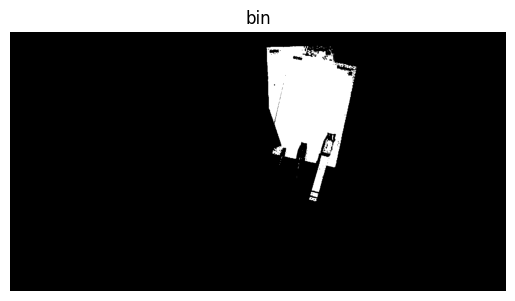

In [13]:
th, y_bw = cv2.threshold(yellow_color, 200, 255, cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [14]:

import skimage as ski

In [15]:
rp = ski.measure.regionprops(y_bw)
len(rp)

1

In [16]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox   # y1,x1,y2,x2

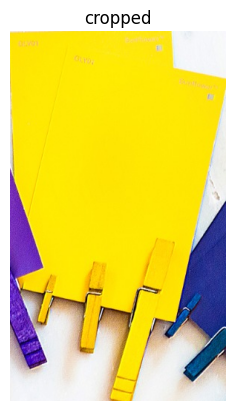

In [17]:
img_cropped = img[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')


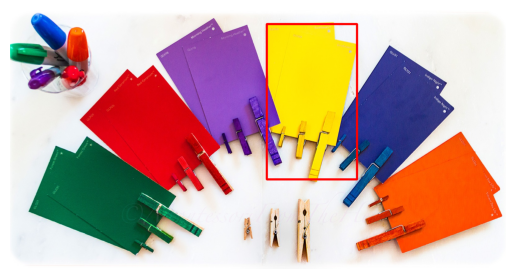

In [18]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')

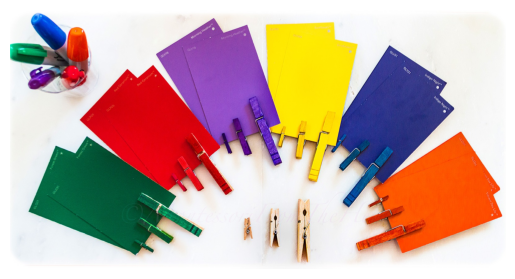

In [19]:
#dilation-something to grow
#erosion - to remove
img = cv2.imread('rrr.jpeg')
imshow(img[:,:,::-1] ,'')

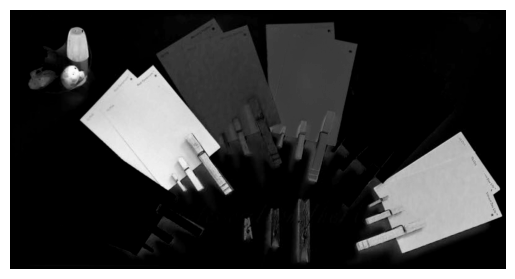

In [20]:
red_img = cv2.subtract(
    img[:,:,-1],cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
imshow(red_img, '','gray')

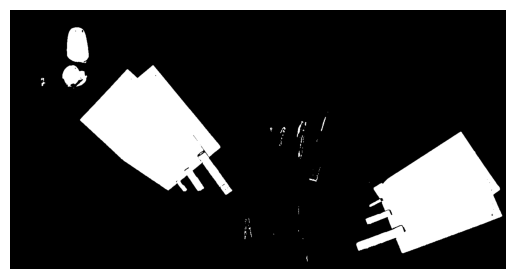

In [21]:
_, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [22]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

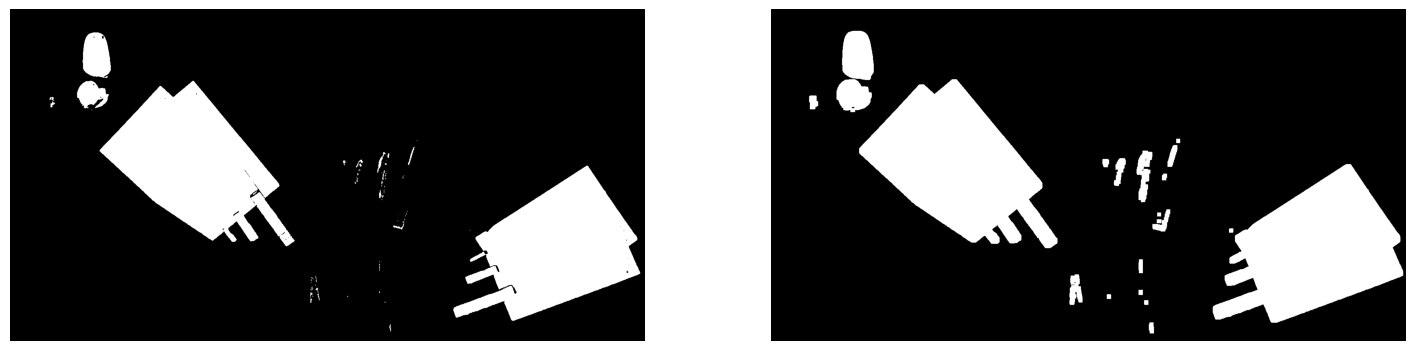

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_dilate = cv2.dilate(red_bw, strel)
imshow(red_dilate, '','gray')

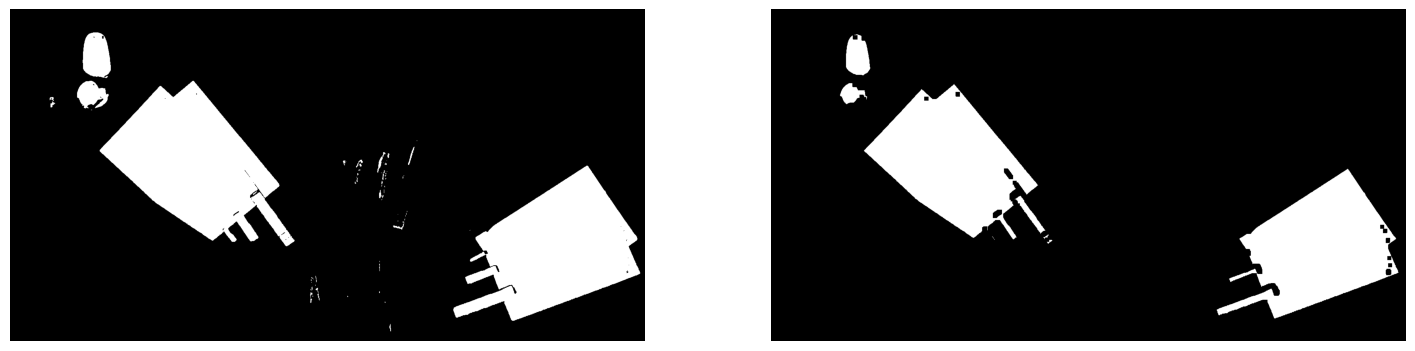

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_erode = cv2.erode(red_bw, strel)
imshow(red_erode, '','gray')

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_erode = cv2.erode(red_bw, strel)
imshow(red_erode, '','gray')

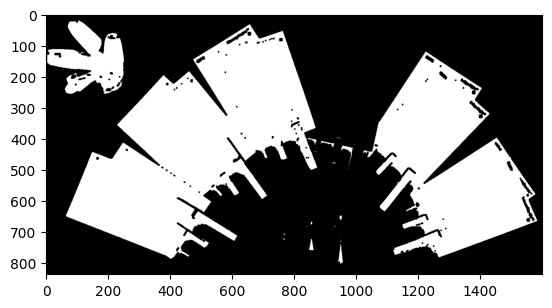

In [19]:
# import the necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv2.imread(r"rrr.jpeg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((5, 5), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# erode the image
erosion = cv2.erode(invert, kernel,
					iterations=1)

# print the output
plt.imshow(erosion, cmap='gray')


In [ ]:
import skimage as plt